In [37]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Exercise 1:

 - How would you represent an orderbook in python ?
 - Create a dummy orderbook and plot it

In [110]:
ob = {
        'sym': 'XBTUSD',
        'market': 'KRAKEN',
        'marketTimestamp': '',
        'bids': {32190.30000: 0.04579906,
                 32189.90000: 0.28206982,
                 32189.50000: 0.10000000,
                 32187.80000: 0.15492926,
                 32187.40000: 0.19089654,
                 32187.30000: 0.54200000,
                 32186.70000: 0.39760000,
                 32186.60000: 0.10000000,
                 32184.80000: 0.07650675,
                 32184.70000: 0.42340000},
         "asks": {32199.70000: 0.80291486,
                 32200.00000: 0.10000000,
                 32201.20000: 0.31061608,
                 32201.40000: 0.77653633,
                 32202.20000: 1.55334945,
                 32204.50000: 0.29346981,
                 32204.90000: 0.03105114,
                 32205.60000: 1.98440000,
                 32206.80000: 0.07650649,
                 32207.10000: 0.23251983}
    }

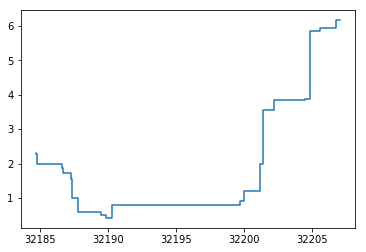

In [118]:
def getListsOfSizesAndPrices(side):
    side = dict(sorted(side.items()))
    p = []
    s = []
    for k,v in side.items():
        p.append(float(k))
        s.append(float(v))
    return p, np.cumsum(s)
    
p_a,s_a = getListsOfSizesAndPrices(ob["asks"])
p_b,s_b = getListsOfSizesAndPrices(ob["bids"])
p = p_b+p_a
s=sorted(s_b,reverse=True)+ sorted(s_a,reverse=False)
plt.step(p,s)

Exercise 2:
- Given $n$ orderbooks, write a function to aggregate them in a single one
- Take the $m$ levels VWAP of the aggregated orderbook

In [1]:
ob1 = {
        'sym': 'XBTUSD',
        'market': 'KRAKEN',
        'marketTimestamp': '',
        'bids': {32190.30000: 0.04579906,
                 32189.90000: 0.28206982,
                 32189.50000: 0.10000000,
                 32187.80000: 0.15492926,
                 32187.40000: 0.19089654,
                 32187.30000: 0.54200000,
                 32186.70000: 0.39760000,
                 32186.60000: 0.10000000,
                 32184.80000: 0.07650675,
                 32184.70000: 0.42340000},
         "asks": {32199.70000: 0.80291486,
                 32200.00000: 0.10000000,
                 32201.20000: 0.31061608,
                 32201.40000: 0.77653633,
                 32202.20000: 1.55334945,
                 32204.50000: 0.29346981,
                 32204.90000: 0.03105114,
                 32205.60000: 1.98440000,
                 32206.80000: 0.07650649,
                 32207.10000: 0.23251983}
    }


In [19]:
def modify_side(ob_side,fp=0.1,fs=0.1):
    new_side = {}
    for k,v in ob_side.items():
        new_side[k*(1+fp)] = v*(1+fs)
    return new_side

def create_new_ob(ob,fp=0.001,fs=0.001):
    return {
        'sym': 'XBTUSD',
        'market': 'KRAKEN',
        'marketTimestamp': '',
        'bids': modify_side(ob["bids"],fp,fs),
        'asks': modify_side(ob["asks"],fp,fs)
        }
obs = [ob1,create_new_ob(ob1,fp=0.001,fs=0.001)]

In [16]:
sides = ["bids","asks"]
all_bids = {}
all_asks = {}
for ob in obs:
    all_bids.update(ob["bids"])
    all_asks.update(ob["asks"])
all_bids = dict(sorted(all_bids.items()))
all_asks = dict(sorted(all_asks.items()))

{32199.7: 0.80291486,
 32200.0: 0.1,
 32201.2: 0.31061608,
 32201.4: 0.77653633,
 32202.2: 1.55334945,
 32204.5: 0.29346981,
 32204.9: 0.03105114,
 32205.6: 1.9844,
 32206.8: 0.07650649,
 32207.1: 0.23251983,
 35419.670000000006: 0.883206346,
 35420.0: 0.11000000000000001,
 35421.32000000001: 0.34167768800000003,
 35421.54: 0.854189963,
 35422.420000000006: 1.7086843950000001,
 35424.950000000004: 0.32281679100000005,
 35425.39000000001: 0.034156254000000004,
 35426.16: 2.18284,
 35427.48: 0.084157139,
 35427.81: 0.255771813}